In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heights-and-weights-dataset/SOCR-HeightWeight.csv


In [2]:
df = pd.read_csv("/kaggle/input/heights-and-weights-dataset/SOCR-HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

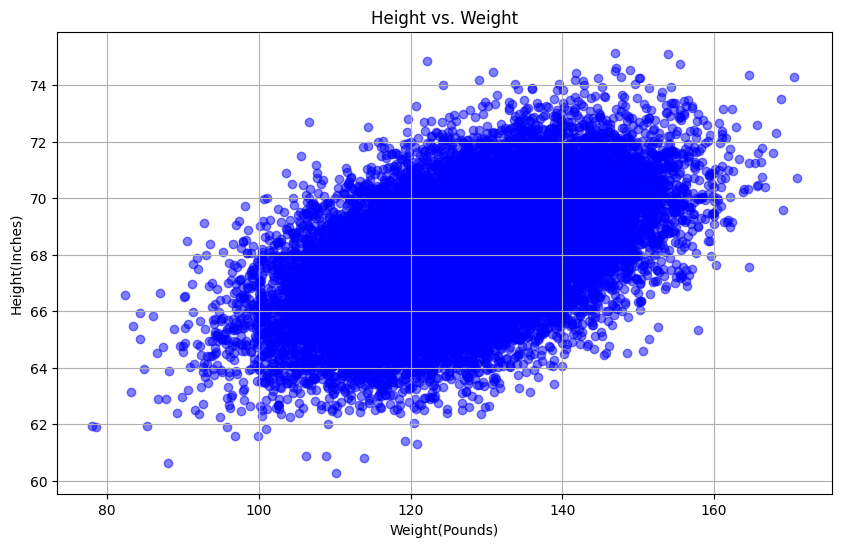

In [4]:
## Scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight(Pounds)'], df['Height(Inches)'], color='blue', alpha=0.5)
plt.title('Height vs. Weight')
plt.xlabel('Weight(Pounds)')
plt.ylabel('Height(Inches)')
plt.grid(True)

In [5]:
df.drop('Index',axis=1,inplace=True)
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [6]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


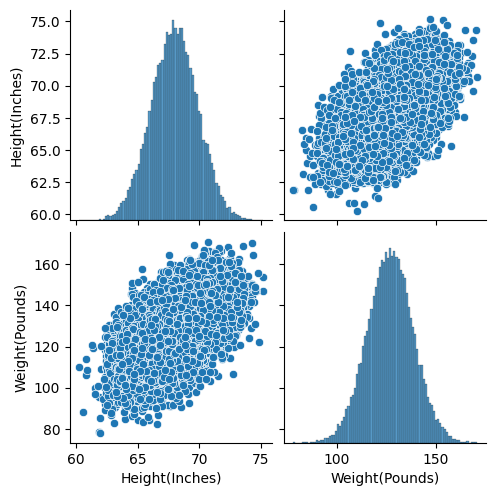

In [7]:
import seaborn as sns
sns.pairplot(df)

In [33]:
# Indipeendent and Dependent 
X = df[['Height(Inches)']]  ### your independent feature should be data frame or 2d array
y = df['Weight(Pounds)']   ### this variable can be series or 1D array

In [34]:
X.head()

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781


In [35]:
y.head()

0    112.9925
1    136.4873
2    153.0269
3    142.3354
4    144.2971
Name: Weight(Pounds), dtype: float64

In [36]:
X_series =  df['Weight(Pounds)']

In [37]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.25,random_state=42)
# random_state = we can randomly choose the  train and the test dataset

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18750, 1), (6250, 1), (18750,), (6250,))

In [39]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [41]:
# for test dataset we will use the mean,standard deviation of the train dataset 
# because we dont want any data leakage
X_test = scaler.transform(X_test)

In [42]:
## Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [44]:
regression = LinearRegression()

In [45]:
regression.fit(X_train,y_train)

LinearRegression()

In [46]:
print('Coefficent or slope',regression.coef_)
print('Intercept',regression.intercept_)

Coefficent or slope [5.82227372]
Intercept 127.06924639893332


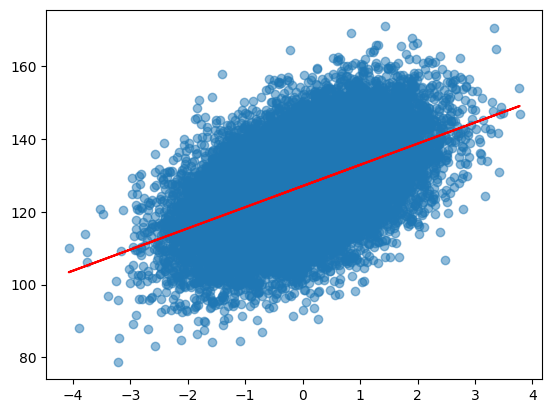

In [47]:
## plot training data plot best fit line
plt.scatter(X_train,y_train,alpha=0.5)
plt.plot(X_train,regression.predict(X_train),color='red')

In [48]:
## Prediction for test data
y_prdt=regression.predict(X_test)

In [49]:
## Performace Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
mse=mean_squared_error(y_test,y_prdt)
mae=mean_absolute_error(y_test,y_prdt)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

102.34698512064793
8.041117903549644
10.116668677022487


## R square
R^2 = 1- SSR/SST


In [52]:
from sklearn.metrics import r2_score

In [53]:
score = r2_score(y_test,y_prdt)
print(score)

0.2593047494927633


# Ajusted R^2

In [54]:
r2 = r2_score(y_test, y_prdt)
n = len(y_test)         # number of observations
p = X_test.shape[1]     # number of predictors (features)
# Adjusted R² formula
adj_r2 = 1 - ( (1 - r2) * (n - 1) / (n - p - 1) )

print("Adjusted R²:", adj_r2)

Adjusted R²: 0.25918620031694595


In [55]:
## OLS Linear Regression
import statsmodels.api as sm

In [56]:
model = sm.OLS(y_train,X_train).fit()

In [57]:
print(model.predict(X_test))

[  1.32302083  -0.29860198  -1.02796972 ...   3.8475899  -10.49343708
 -13.64768145]


In [58]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Weight(Pounds)   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              39.12
Date:                Thu, 10 Jul 2025   Prob (F-statistic):                    4.08e-10
Time:                        09:48:17   Log-Likelihood:                     -1.1750e+05
No. Observations:               18750   AIC:                                  2.350e+05
Df Residuals:                   18749   BIC:                                  2.350e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
## Prediction for new data
regression.predict(scaler.transform([[65]]))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([117.87165749])

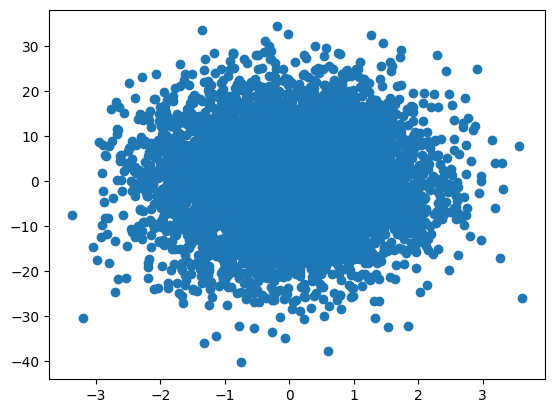

In [61]:
residual = y_test - y_prdt
plt.scatter(X_test,residual)